In [1]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import scale, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics.pairwise import pairwise_distances_argmin

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Heart Failure

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
X = data.copy()
X.drop(columns='DEATH_EVENT', inplace=True)
features = X.columns
target_names = np.unique(data['DEATH_EVENT'])
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### k-Means Clustering

Accuracy: 0.5714285714285714
Accuracy: 0.4666666666666667
{'algorithm': 'elkan', 'max_iter': 100, 'n_init': 100}


Text(0.5, 1.0, 'k-means of heart failure dataset')

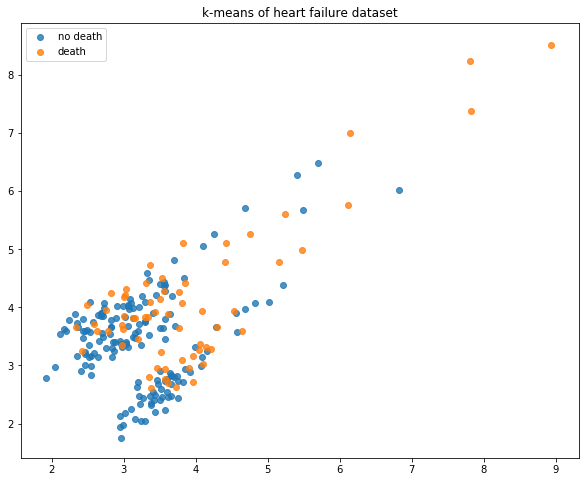

In [3]:
param_grid = {
    'algorithm': ['elkan'],
    'n_init': [10, 100],
    'max_iter': [10, 100]
}
clf = KMeans(n_clusters=2)
clf_gscv = GridSearchCV(clf, param_grid, cv=5) #fit model to data
clf_gscv.fit(X_train, y_train)


y_pred = clf_gscv.predict(X_train)
print(f'Accuracy: {accuracy_score(y_train.values, y_pred)}')

y_pred = clf_gscv.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test.values, y_pred)}')

print(clf_gscv.best_params_)

X = clf_gscv.transform(X_train)

plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1, 2], ['no death', 'death']):
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('k-means of heart failure dataset')

### Expectation Maximization

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Accuracy: 0.27232142857142855
Accuracy: 0.14666666666666667
{'covariance_type': 'diag', 'max_iter': 10, 'n_init': 10}


Text(0.5, 1.0, 'EM of heart failure dataset')

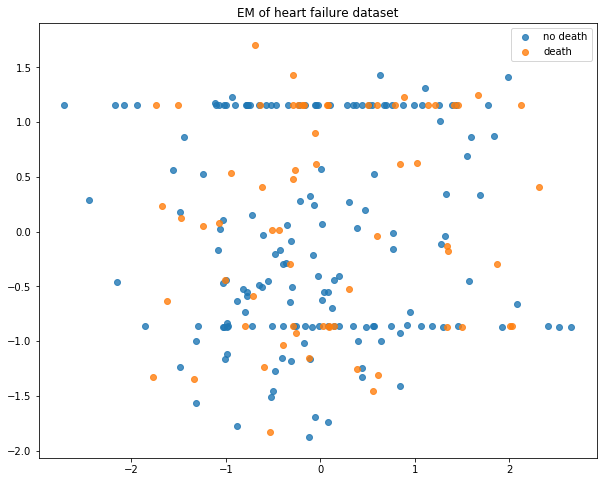

In [4]:
param_grid = {
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'n_init': [10, 100],
    'max_iter': [10, 100]
}
clf = GaussianMixture(n_components=7)
clf_gscv = GridSearchCV(clf, param_grid, cv=5) #fit model to data
clf_gscv.fit(X_train, y_train)

y_pred = clf_gscv.predict(X_train)
print(f'Accuracy: {accuracy_score(y_train.values, y_pred)}')

y_pred = clf_gscv.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test.values, y_pred)}')

print(clf_gscv.best_params_)
clf.fit(X_train, y_train)
X = clf.sample(X_train.shape[0])[0]

plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1, 2], ['no death', 'death']):
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('EM of heart failure dataset')

### PCA

Text(0.5, 1.0, 'PCA of heart failure dataset')

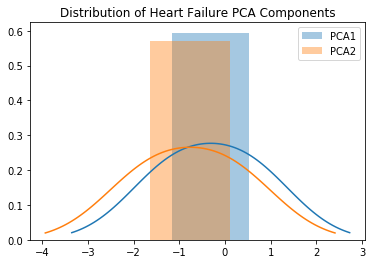

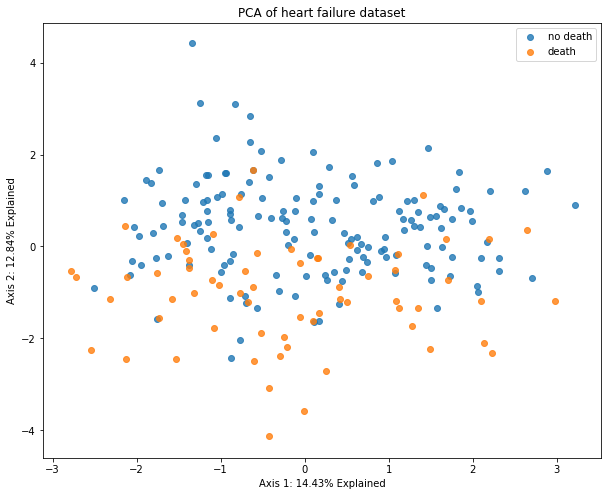

In [5]:
pca = PCA(n_components=2)
pca.fit(X_train)
X = pca.transform(X_train)

var_explained = pca.explained_variance_ratio_
sns.distplot(X[0], label='PCA1')
sns.distplot(X[1], label='PCA2')
plt.legend()
plt.title('Distribution of Heart Failure PCA Components')

plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1, 2], ['no death', 'death']):
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel(f'Axis 1: {np.round(var_explained[0]*100,2)}% Explained')
plt.ylabel(f'Axis 2: {np.round(var_explained[1]*100,2)}% Explained')
plt.title('PCA of heart failure dataset')

### ICA

Text(0.5, 1.0, 'ICA of heart failure dataset')

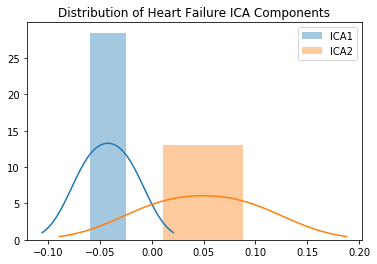

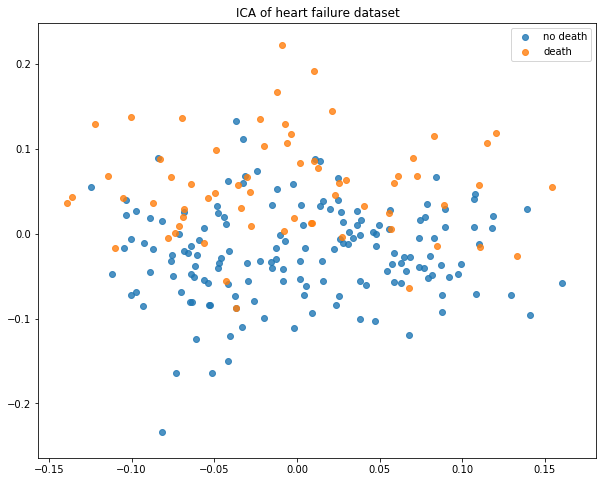

In [6]:
ica = FastICA(n_components=2)
ica.fit(X_train)
X = ica.transform(X_train)
#var_explained = ica.explained_variance_ratio_

sns.distplot(X[0], label='ICA1')
sns.distplot(X[1], label='ICA2')
plt.legend()
plt.title('Distribution of Heart Failure ICA Components')

plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1, 2], ['no death', 'death']):
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.xlabel(f'Axis 1: {np.round(var_explained[0]*100,2)}% Explained')
#plt.ylabel(f'Axis 2: {np.round(var_explained[1]*100,2)}% Explained')
plt.title('ICA of heart failure dataset')

### Randomized Projections

Text(0.5, 1.0, 'Randomized Projection of heart failure dataset')

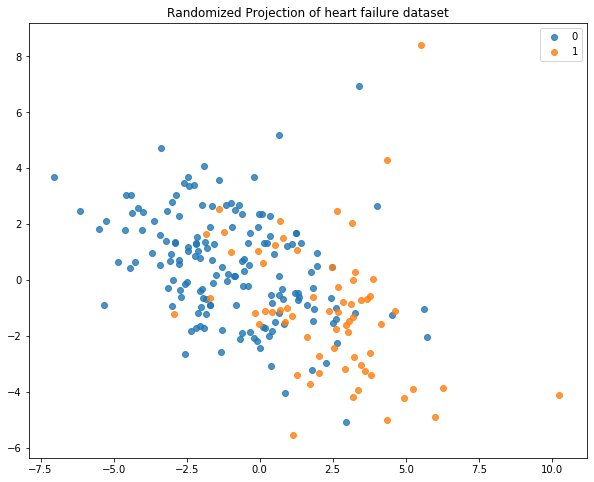

In [7]:
random_project = GaussianRandomProjection(n_components=2)
random_project.fit(X_train)
X = random_project.transform(X_train)
#var_explained = ica.explained_variance_ratio_

X = random_project.transform(X_train)
for i in range(99):
    new = random_project.transform(X_train)
    X += new
X /= 100

plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1, 2], target_names):
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.xlabel(f'Axis 1: {np.round(var_explained[0]*100,2)}% Explained')
#plt.ylabel(f'Axis 2: {np.round(var_explained[1]*100,2)}% Explained')
plt.title('Randomized Projection of heart failure dataset')

### Decision Tree for Feature Importance

Accuracy: 0.7066666666666667
[0.         0.         0.         0.         0.         0.
 0.         0.14358336 0.04844921 0.         0.         0.80796743]
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')


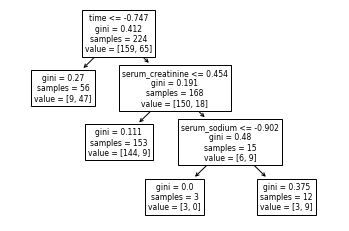

In [8]:
tree = DecisionTreeClassifier(ccp_alpha=0.012, max_depth=7)
tree.fit(X_train, y_train.values)

y_pred = tree.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test.values, y_pred)}')

print(tree.feature_importances_)
print(features)

plot_tree(tree, feature_names=features)
plt.show()

### Revisit k-Means and EM Using New Data

k-Means
Expectation Maximization


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initializat

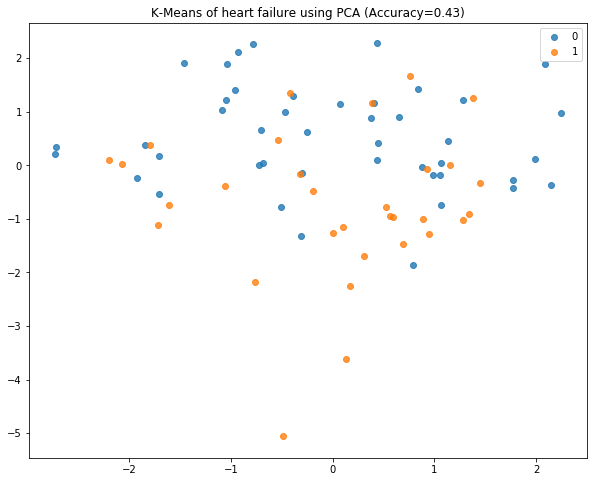

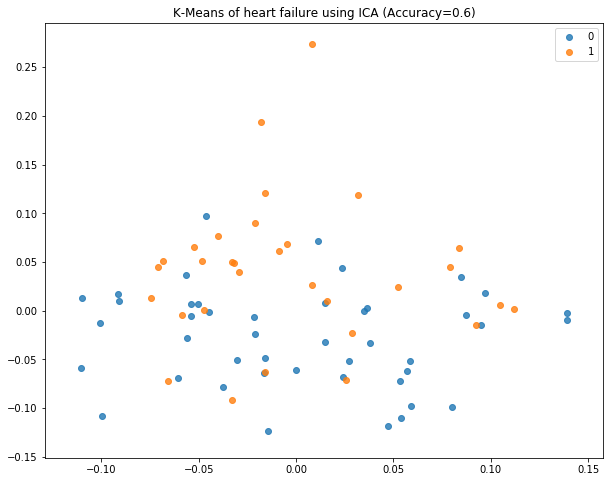

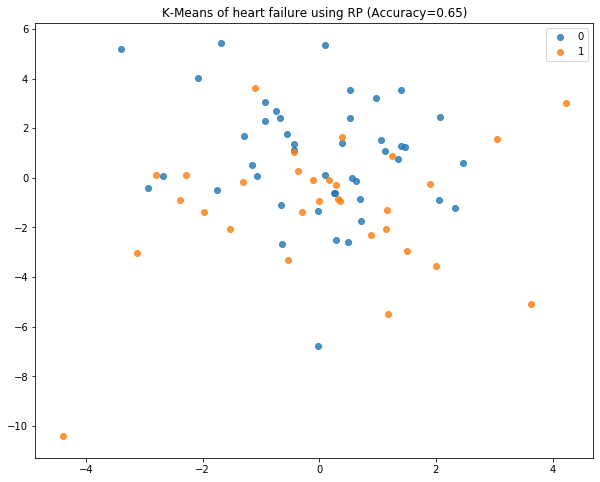

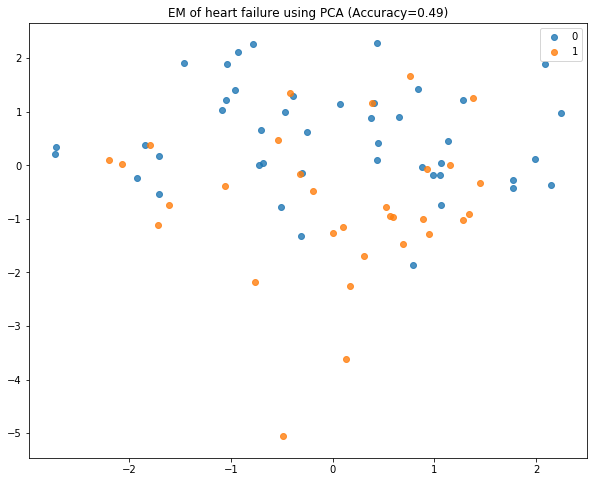

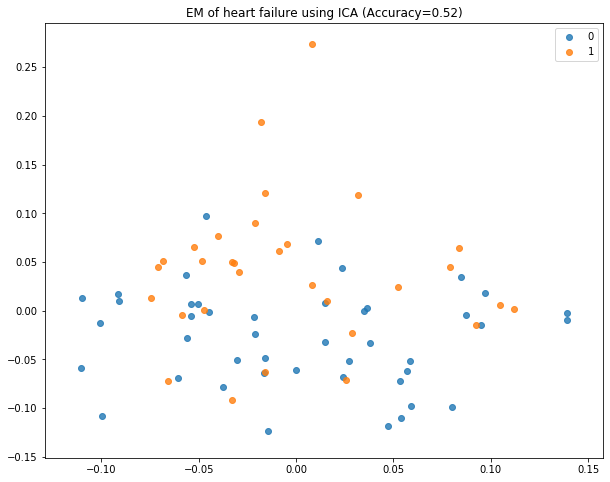

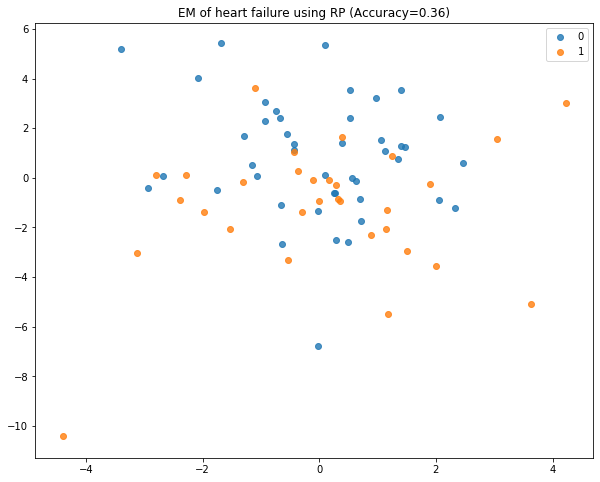

In [10]:
pca = PCA(n_components=2)
pca.fit(X_train)
pca_X = pca.transform(X_train)
pca_test = pca.transform(X_test)

ica = FastICA(n_components=2)
ica.fit(X_train)
ica_X = ica.transform(X_train)
ica_test = ica.transform(X_test)

random_project = GaussianRandomProjection(n_components=2)
random_project.fit(X_train)
rp_X = random_project.transform(X_train)
rp_test = random_project.transform(X_test)
for i in range(99):
    new = random_project.transform(X_train)
    rp_X += new
    new = random_project.transform(X_test)
    rp_test += new
rp_X /= 100
rp_test /= 100

dt_X = X_train[:,[7,8,11]]
dt_test = X_test[:,[7,8,11]]

param_grid = {
    'algorithm': ['auto', 'full', 'elkan'],
    'n_init': [10, 100],
    'max_iter': [10, 100]
}
print('k-Means')
clf = KMeans(n_clusters=2)
df = []

df.append({'source':'initial', 'method':'K-Means', 
           'train_accuracy': 0.46, 'test_accuracy': 0.56,
 'algorithm': 'auto', 'max_iter': 10, 'n_init': 100})

for name, x, test in zip(['PCA', 'ICA', 'RP', 'DT'], [pca_X, ica_X, rp_X, dt_X],
                        [pca_test, ica_test, rp_test, dt_test]):
    clf_gscv = GridSearchCV(clf, param_grid, cv=5) #fit model to data
    clf_gscv.fit(x, y_train.values)
    y_pred = clf_gscv.predict(x)
    clf_gscv.best_params_['method'] = 'K-Means'
    clf_gscv.best_params_['source'] = name
    clf_gscv.best_params_['train_accuracy'] = \
            accuracy_score(y_train.values, y_pred)
    y_pred = clf_gscv.predict(test)
    clf_gscv.best_params_['test_accuracy'] = \
            accuracy_score(y_test.values, y_pred)
    df.append(clf_gscv.best_params_)
    if name is not 'DT':
        plt.figure(figsize=(10, 8))
        for i, target_name in zip([0, 1, 2, 3, 4, 5, 6], target_names):
            plt.scatter(test[y_test == i, 0], test[y_test == i, 1], 
                        alpha=.8, label=target_name)
        plt.title(f'K-Means of heart failure using {name} '
                  f'(Accuracy={np.round(accuracy_score(y_test, y_pred),2)})')
        plt.legend()
        plt.savefig(f'hf-{name}-k-means.png')
    
param_grid = {
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'n_init': [10, 100],
    'max_iter': [10, 100]
}
print('Expectation Maximization')
clf = GaussianMixture(n_components=2)

df.append({'source': 'initial','method': 'EM', 'covariance_type': 'diag', 'max_iter': 10, 
 'n_init': 10, 'train_accuracy': 0.42, 'test_accuracy': 0.52})

for name, x, test in zip(['PCA', 'ICA', 'RP', 'DT'], [pca_X, ica_X, rp_X, dt_X],
                        [pca_test, ica_test, rp_test, dt_test]):
    clf_gscv = GridSearchCV(clf, param_grid, cv=5) #fit model to data
    clf_gscv.fit(x, y_train.values)
    y_pred = clf_gscv.predict(x)
    clf_gscv.best_params_['method'] = 'EM'
    clf_gscv.best_params_['source'] = name
    clf_gscv.best_params_['train_accuracy'] = \
            accuracy_score(y_train.values, y_pred)
    y_pred = clf_gscv.predict(test)
    clf_gscv.best_params_['test_accuracy'] = \
            accuracy_score(y_test.values, y_pred)
    df.append(clf_gscv.best_params_)
    if name is not 'DT':
        plt.figure(figsize=(10, 8))
        for i, target_name in zip([0, 1, 2, 3, 4, 5, 6], target_names):
            plt.scatter(test[y_test == i, 0], test[y_test == i, 1], 
                        alpha=.8, label=target_name)
        plt.legend()
        plt.title(f'EM of heart failure using {name} '
                  f'(Accuracy={np.round(accuracy_score(y_test, y_pred),2)})')
        plt.savefig(f'hf-{name}-em.png')
    

In [11]:
data = pd.DataFrame(df)
data[['method', 'source', 'algorithm', 'covariance_type', 
      'max_iter', 'n_init', 'train_accuracy', 'test_accuracy']]

,method,source,algorithm,covariance_type,max_iter,n_init,train_accuracy,test_accuracy
0,K-Means,initial,auto,NaN,10,100,0.460000,0.560000
1,K-Means,PCA,auto,NaN,100,10,0.473214,0.426667
2,K-Means,ICA,auto,NaN,100,10,0.517857,0.600000
3,K-Means,RP,auto,NaN,10,10,0.776786,0.653333
4,K-Means,DT,full,NaN,10,10,0.334821,0.373333
5,EM,initial,NaN,diag,10,10,0.420000,0.520000
6,EM,PCA,NaN,diag,10,10,0.513393,0.493333
7,EM,ICA,NaN,diag,10,100,0.495536,0.520000
8,EM,RP,NaN,tied,100,10,0.196429,0.360000
9,EM,DT,NaN,diag,100,10,0.790179,0.640000


### Neural Network

In [12]:
pca = PCA(n_components=2)
pca.fit(X_train)
pca_X = pca.transform(X_train)
pca_test = pca.transform(X_test)

ica = FastICA(n_components=2)
ica.fit(X_train)
ica_X = ica.transform(X_train)
ica_test = ica.transform(X_test)

random_project = GaussianRandomProjection(n_components=2)
random_project.fit(X_train)
rp_X = random_project.transform(X_train)
rp_test = random_project.transform(X_test)
for i in range(99):
    new = random_project.transform(X_train)
    rp_X += new
    new = random_project.transform(X_test)
    rp_test += new
rp_X /= 100
rp_test /= 100

dt_X = X_train[:,[7,8,11]]
dt_test = X_test[:,[7,8,11]]

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
kmeans_X = kmeans.transform(X_train)
kmeans_test = kmeans.transform(X_test)

clf = GaussianMixture(n_components=2)
clf.fit(X_train, y_train)
em_X = clf.sample(X_train.shape[0])[0]
em_test = clf.sample(X_test.shape[0])[0]
df = []

for name, x, test in zip(['PCA', 'ICA', 'RP', 'DT', 'k-means', 'EM'], 
                         [pca_X, ica_X, rp_X, dt_X, kmeans_X, em_X],
                        [pca_test, ica_test, rp_test, dt_test, kmeans_test, em_test]):
    clf = MLPClassifier(activation='relu', 
                    hidden_layer_sizes=(128, 2), max_iter=10000, 
                    solver='sgd')
    clf.fit(x, y_train)
    y_pred = clf.predict(x)
    params = {}
    params['source'] = name
    params['train_accuracy'] = \
            accuracy_score(y_train.values, y_pred)
    y_pred = clf.predict(test)
    params['test_accuracy'] = \
            accuracy_score(y_test.values, y_pred)
    df.append(params)
    
data = pd.DataFrame(df)
data[['source', 'train_accuracy', 'test_accuracy']]

,source,train_accuracy,test_accuracy
0,PCA,0.709821,0.586667
1,ICA,0.709821,0.586667
2,RP,0.776786,0.653333
3,DT,0.718750,0.600000
4,k-means,0.709821,0.586667
5,EM,0.709821,0.586667


## Obesity

In [13]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
features = df.columns
target_names = np.unique(df['NObeyesdad'])
# Handle Categorical features
clfs = {c:LabelEncoder() for c in ['Gender', 'family_history_with_overweight',
                                   'FAVC', 'CAEC', 'SMOKE', 
                                   'SCC','CALC', 'MTRANS', 'NObeyesdad']}
for col, clf in clfs.items():
    df[col] = clfs[col].fit_transform(df[col])

X = df.drop(columns='NObeyesdad').values
y = df['NObeyesdad'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### k-Means Clustering

Accuracy: 0.13202779532533165
Accuracy: 0.10606060606060606
{'algorithm': 'elkan', 'max_iter': 10, 'n_init': 100}


Text(0.5, 1.0, 'k-means of obesity dataset')

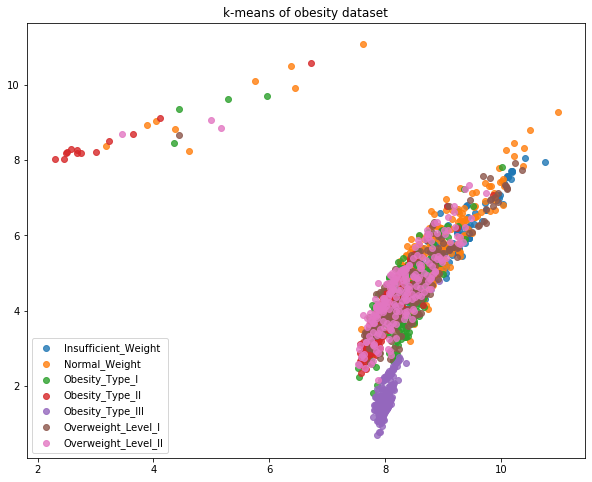

In [14]:
param_grid = {
    'algorithm': ['auto', 'elkan'],
    'n_init': [10, 100],
    'max_iter': [10, 100]
}
clf = KMeans(n_clusters=7)
clf_gscv = GridSearchCV(clf, param_grid, cv=5) #fit model to data
clf_gscv.fit(X_train, y_train)

y_pred = clf_gscv.predict(X_train)
print(f'Accuracy: {accuracy_score(y_train, y_pred)}')

y_pred = clf_gscv.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

print(clf_gscv.best_params_)

X = clf_gscv.transform(X_train)

plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1, 2, 3, 4, 5, 6], target_names):
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('k-means of obesity dataset')

### Expectation Maximization

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Accuracy: 0.11876184459886292
Accuracy: 0.21401515151515152
{'covariance_type': 'full', 'max_iter': 100, 'n_init': 100}


Text(0.5, 1.0, 'EM of obesity dataset')

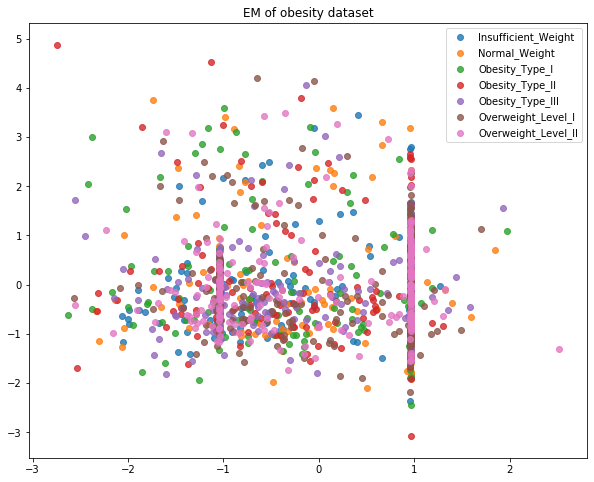

In [15]:
param_grid = {
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'n_init': [10, 100],
    'max_iter': [10, 100]
}
clf = GaussianMixture(n_components=7)
clf_gscv = GridSearchCV(clf, param_grid, cv=5) #fit model to data
clf_gscv.fit(X_train, y_train)

y_pred = clf_gscv.predict(X_train)
print(f'Accuracy: {accuracy_score(y_train, y_pred)}')

y_pred = clf_gscv.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

print(clf_gscv.best_params_)
clf.fit(X_train, y_train)
X = clf.sample(X_train.shape[0])[0]

plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1, 2, 3, 4, 5, 6], target_names):
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('EM of obesity dataset')

### PCA

Text(0.5, 1.0, 'PCA of obsesity dataset')

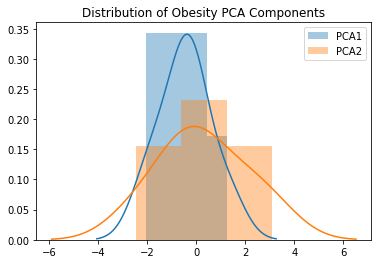

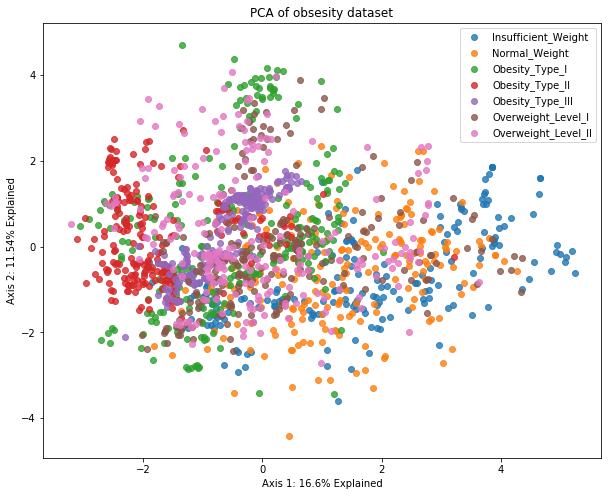

In [16]:
pca = PCA(n_components=7)
pca.fit(X_train)
X = pca.transform(X_train)
var_explained = pca.explained_variance_ratio_

sns.distplot(X[0], label='PCA1')
sns.distplot(X[1], label='PCA2')
plt.legend()
plt.title('Distribution of Obesity PCA Components')

plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1, 2, 3, 4, 5, 6], target_names):
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel(f'Axis 1: {np.round(var_explained[0]*100,2)}% Explained')
plt.ylabel(f'Axis 2: {np.round(var_explained[1]*100,2)}% Explained')
plt.title('PCA of obsesity dataset')

### ICA

Text(0.5, 1.0, 'ICA of obsesity dataset')

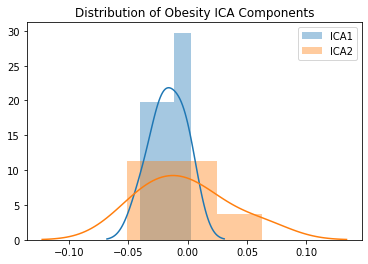

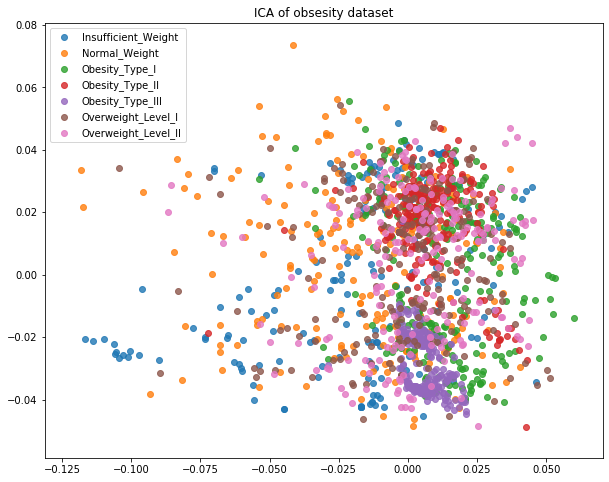

In [17]:
ica = FastICA(n_components=7)
ica.fit(X_train)
X = ica.transform(X_train)
#var_explained = ica.explained_variance_ratio_

sns.distplot(X[0], label='ICA1')
sns.distplot(X[1], label='ICA2')
plt.legend()
plt.title('Distribution of Obesity ICA Components')

plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1, 2, 3, 4, 5, 6], target_names):
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.xlabel(f'Axis 1: {np.round(var_explained[0]*100,2)}% Explained')
#plt.ylabel(f'Axis 2: {np.round(var_explained[1]*100,2)}% Explained')
plt.title('ICA of obsesity dataset')

### Randomized Projections

Text(0.5, 1.0, 'Randomized Projection of obesity dataset')

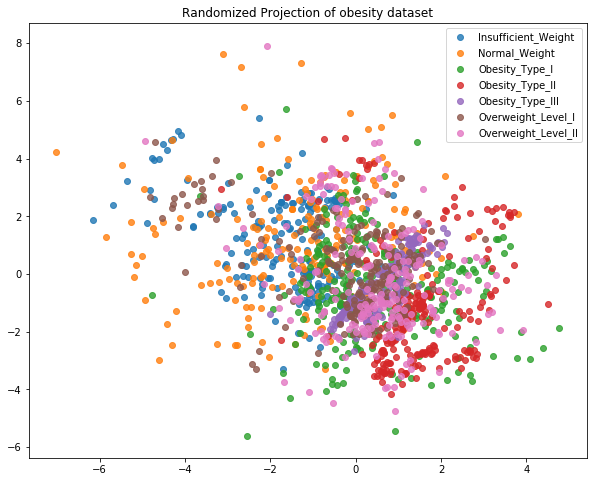

In [18]:
random_project = GaussianRandomProjection(n_components=7)
random_project.fit(X_train)
X = random_project.transform(X_train)
for i in range(99):
    new = random_project.transform(X_train)
    X += new
X /= 100
#var_explained = ica.explained_variance_ratio_

plt.figure(figsize=(10, 8))
for i, target_name in zip([0, 1, 2, 3, 4, 5, 6], target_names):
    plt.scatter(X[y_train == i, 0], X[y_train == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.xlabel(f'Axis 1: {np.round(var_explained[0]*100,2)}% Explained')
#plt.ylabel(f'Axis 2: {np.round(var_explained[1]*100,2)}% Explained')
plt.title('Randomized Projection of obesity dataset')

### Decision Tree for Feature Importance

Accuracy: 0.8484848484848485
[0.19677104 0.         0.24630013 0.52838119 0.         0.02854764
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


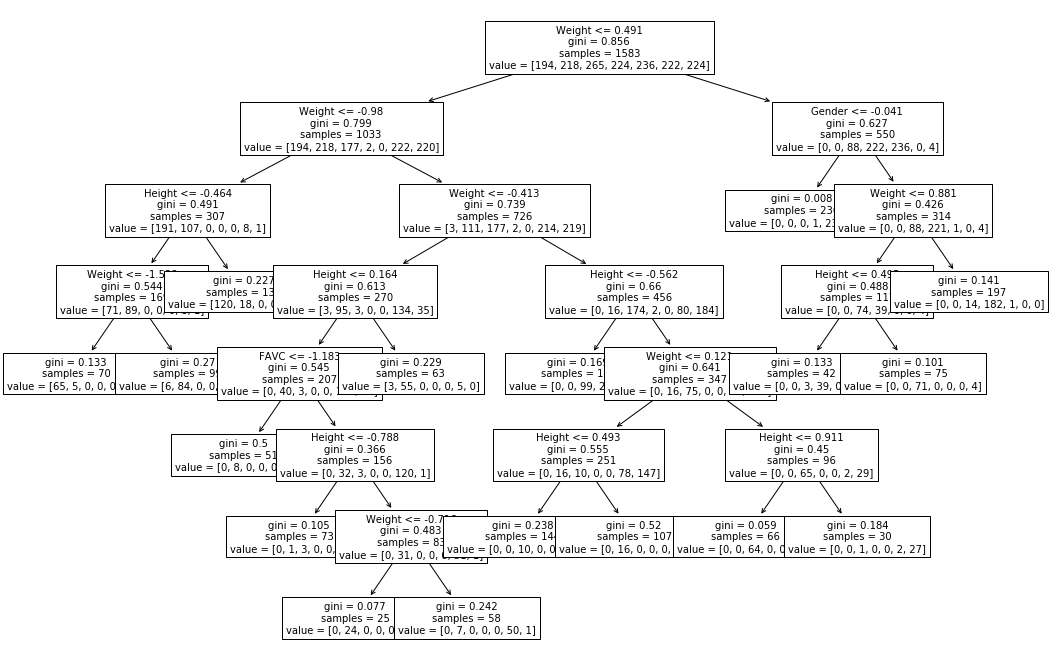

In [19]:
tree = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=9)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

print(tree.feature_importances_)
print(features)

plt.figure(figsize=(18,12))
plot_tree(tree, feature_names=features, fontsize=10)
plt.show()

## Revisit k-Means and EM With New Data

Expectation Maximization


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initializat

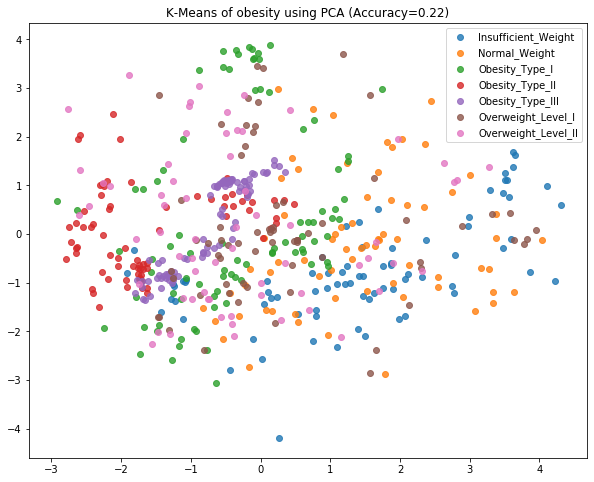

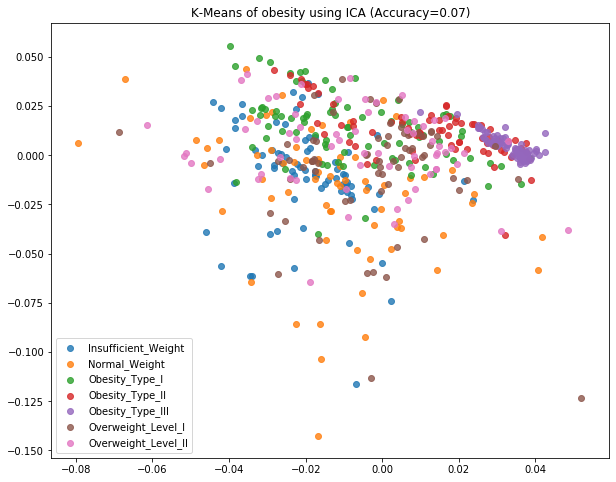

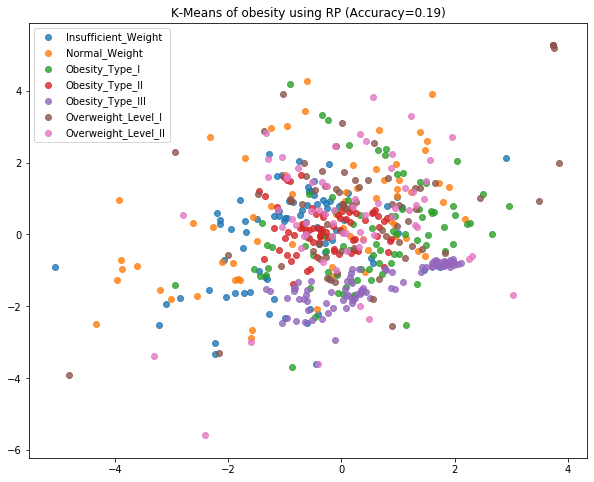

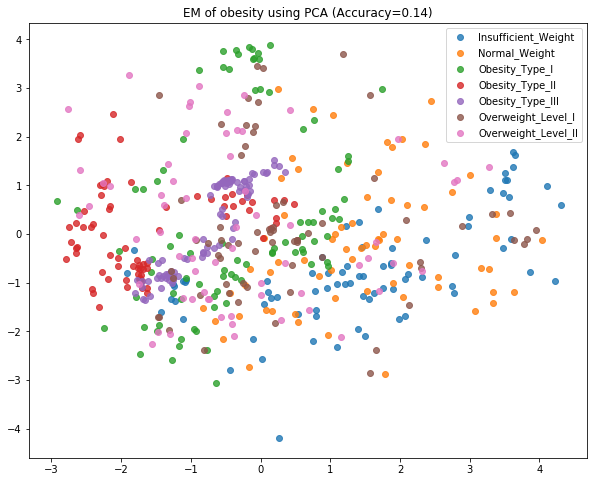

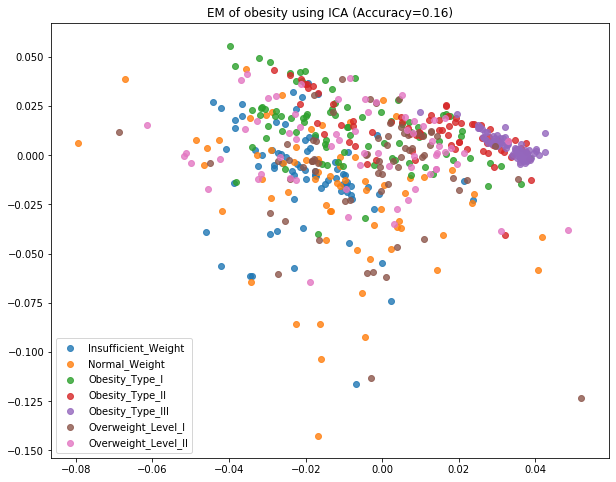

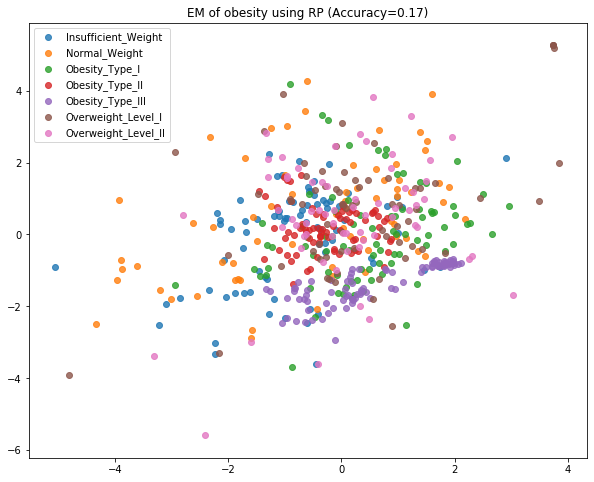

In [21]:
pca = PCA(n_components=7)
pca.fit(X_train)
pca_X = pca.transform(X_train)
pca_test = pca.transform(X_test)

ica = FastICA(n_components=7)
ica.fit(X_train)
ica_X = ica.transform(X_train)
ica_test = ica.transform(X_test)

random_project = GaussianRandomProjection(n_components=7)
random_project.fit(X_train)
rp_X = random_project.transform(X_train)
rp_test = random_project.transform(X_test)
for i in range(99):
    new = random_project.transform(X_train)
    rp_X += new
    new = random_project.transform(X_test)
    rp_test += new
rp_X /= 100
rp_test /= 100

dt_X = X_train[:,[0,2,3,5]]
dt_test = X_test[:,[0,2,3,5]]

param_grid = {
    'algorithm': ['auto', 'full', 'elkan'],
    'n_init': [10, 100],
    'max_iter': [10, 100]
}


clf = KMeans(n_clusters=7)
df = []
df.append({'source':'initial', 'method':'K-Means', 
           'train_accuracy': 0.10, 'test_accuracy': 0.12,
           'algorithm': 'elkan','max_iter': 10, 'n_init': 100})

for name, x, test in zip(['PCA', 'ICA', 'RP', 'DT'], [pca_X, ica_X, rp_X, dt_X],
                        [pca_test, ica_test, rp_test, dt_test]):
    clf_gscv = GridSearchCV(clf, param_grid, cv=5) #fit model to data
    clf_gscv.fit(x, y_train)
    y_pred = clf_gscv.predict(x)
    clf_gscv.best_params_['method'] = 'K-Means'
    clf_gscv.best_params_['source'] = name
    clf_gscv.best_params_['train_accuracy'] = \
            accuracy_score(y_train, y_pred)
    y_pred = clf_gscv.predict(test)
    clf_gscv.best_params_['test_accuracy'] = \
            accuracy_score(y_test, y_pred)
    df.append(clf_gscv.best_params_)
    if name is not 'DT':
        plt.figure(figsize=(10, 8))
        for i, target_name in zip([0, 1, 2, 3, 4, 5, 6], target_names):
            plt.scatter(test[y_test == i, 0], test[y_test == i, 1], 
                        alpha=.8, label=target_name)
        plt.title(f'K-Means of obesity using {name} '
                  f'(Accuracy={np.round(accuracy_score(y_test, y_pred),2)})')
        plt.legend()
        plt.savefig(f'obesity-{name}-k-means.png')
    
param_grid = {
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'n_init': [10, 100],
    'max_iter': [10, 100]
}
print('Expectation Maximization')
clf = GaussianMixture(n_components=7)

df.append({'source': 'initial','method': 'EM', 'covariance_type': 'diag', 'max_iter': 10, 
 'n_init': 10, 'train_accuracy': 0.11, 'test_accuracy': 0.15})

for name, x, test in zip(['PCA', 'ICA', 'RP', 'DT'], [pca_X, ica_X, rp_X, dt_X],
                        [pca_test, ica_test, rp_test, dt_test]):
    clf_gscv = GridSearchCV(clf, param_grid, cv=5) #fit model to data
    clf_gscv.fit(x, y_train)
    y_pred = clf_gscv.predict(x)
    clf_gscv.best_params_['method'] = 'EM'
    clf_gscv.best_params_['source'] = name
    clf_gscv.best_params_['train_accuracy'] = \
            accuracy_score(y_train, y_pred)
    y_pred = clf_gscv.predict(test)
    clf_gscv.best_params_['test_accuracy'] = \
            accuracy_score(y_test, y_pred)
    df.append(clf_gscv.best_params_)
    if name is not 'DT':
        plt.figure(figsize=(10, 8))
        for i, target_name in zip([0, 1, 2, 3, 4, 5, 6], target_names):
            plt.scatter(test[y_test == i, 0], test[y_test == i, 1], 
                        alpha=.8, label=target_name)
        plt.legend()
        plt.title(f'EM of obesity using {name} '
                  f'(Accuracy={np.round(accuracy_score(y_test, y_pred),2)})')
        plt.savefig(f'obesity-{name}-em.png')


In [22]:
data = pd.DataFrame(df)
data[['method', 'source', 'algorithm', 'covariance_type', 
      'max_iter', 'n_init', 'train_accuracy', 'test_accuracy']]

,method,source,algorithm,covariance_type,max_iter,n_init,train_accuracy,test_accuracy
0,K-Means,initial,elkan,NaN,10,100,0.100000,0.120000
1,K-Means,PCA,elkan,NaN,10,10,0.198358,0.223485
2,K-Means,ICA,auto,NaN,100,100,0.070120,0.070076
3,K-Means,RP,elkan,NaN,10,10,0.188882,0.193182
4,K-Means,DT,full,NaN,100,10,0.043588,0.049242
5,EM,initial,NaN,diag,10,10,0.110000,0.150000
6,EM,PCA,NaN,full,100,100,0.097284,0.140152
7,EM,ICA,NaN,full,100,100,0.181301,0.164773
8,EM,RP,NaN,full,100,100,0.065698,0.168561
9,EM,DT,NaN,full,100,10,0.135818,0.134470


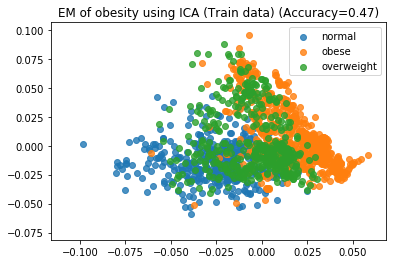

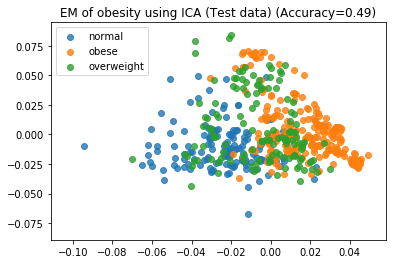

In [23]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
features = df.columns
target_names = np.unique(df['NObeyesdad'])
# Handle Categorical features
clfs = {c:LabelEncoder() for c in ['Gender', 'family_history_with_overweight',
                                   'FAVC', 'CAEC', 'SMOKE', 
                                   'SCC','CALC', 'MTRANS', 'NObeyesdad']}
for col, clf in clfs.items():
    df[col] = clfs[col].fit_transform(df[col])

X = df.drop(columns='NObeyesdad').values
y = df['NObeyesdad'].values
y[y<2] = 0
y[(y>0) & (y<5)] = 1
y[y>1] = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

ica = FastICA(n_components=3)
ica.fit(X_train)
X = ica.transform(X_train)

clf = GaussianMixture(n_components=3, covariance_type='full',
                     max_iter=100, n_init=100)
clf.fit(X, y_train)
y_pred = clf.predict(X)
for i, target_name in zip([0, 1, 2, 3], 
                          ['normal', 'obese', 'overweight']):
        plt.scatter(X[y_train == i, 0], X[y_train == i, 1], 
                    alpha=.8, label=target_name)
plt.legend()
plt.title(f'EM of obesity using ICA (Train data) '
          f'(Accuracy={np.round(accuracy_score(y_train, y_pred),2)})')
plt.show()

X = ica.transform(X_test)
y_pred = clf.predict(X)
for i, target_name in zip([0, 1, 2, 3], 
                          ['normal', 'obese', 'overweight']):
        plt.scatter(X[y_test == i, 0], X[y_test == i, 1], 
                    alpha=.8, label=target_name)
plt.legend()
plt.title(f'EM of obesity using ICA (Test data) '
          f'(Accuracy={np.round(accuracy_score(y_test, y_pred),2)})')
plt.show()

### Neural Network

In [25]:
pca = PCA(n_components=7)
pca.fit(X_train)
pca_X = pca.transform(X_train)
pca_test = pca.transform(X_test)

ica = FastICA(n_components=7)
ica.fit(X_train)
ica_X = ica.transform(X_train)
ica_test = ica.transform(X_test)

random_project = GaussianRandomProjection(n_components=7)
random_project.fit(X_train)
rp_X = random_project.transform(X_train)
rp_test = random_project.transform(X_test)
for i in range(99):
    new = random_project.transform(X_train)
    rp_X += new
    new = random_project.transform(X_test)
    rp_test += new
rp_X /= 100
rp_test /= 100

dt_X = X_train[:,[0,2,3,5]]
dt_test = X_test[:,[0,2,3,5]]

kmeans = KMeans(n_clusters=7)
kmeans.fit(X_train)
kmeans_X = kmeans.transform(X_train)
kmeans_test = kmeans.transform(X_test)

clf = GaussianMixture(n_components=7)
clf.fit(X_train, y_train)
em_X = clf.sample(X_train.shape[0])[0]
em_test = clf.sample(X_test.shape[0])[0]
df = []

for name, x, test in zip(['PCA', 'ICA', 'RP', 'DT', 'k-means', 'EM'], 
                         [pca_X, ica_X, rp_X, dt_X, kmeans_X, em_X],
                        [pca_test, ica_test, rp_test, dt_test, kmeans_test, em_test]):
    clf = MLPClassifier(activation='relu', 
                    hidden_layer_sizes=(128, 2), max_iter=10000, 
                    solver='sgd')
    clf.fit(x, y_train)
    y_pred = clf.predict(x)
    params = {}
    params['source'] = name
    params['train_accuracy'] = \
            accuracy_score(y_train, y_pred)
    y_pred = clf.predict(test)
    params['test_accuracy'] = \
            accuracy_score(y_test, y_pred)
    df.append(params)
    
data = pd.DataFrame(df)
data[['source', 'train_accuracy', 'test_accuracy']]

,source,train_accuracy,test_accuracy
0,PCA,0.967151,0.854167
1,ICA,0.457991,0.467803
2,RP,0.917246,0.801136
3,DT,0.989893,0.981061
4,k-means,0.736576,0.744318
5,EM,0.457991,0.467803
